**PROJEC**T : COLOR IDENTIFICATION

AUTHOR :** ANSHU SHARMA**

**GRIP THE SPARKS FOUNDATION**

DATA AND BUISNESS ANALYTICS INTERN  

In [3]:
# importing all necessary libraries
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os
%matplotlib inline

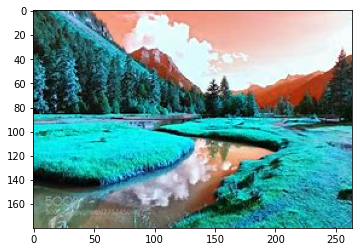

In [4]:
# loading image in working environment
img = cv2.imread("/content/myimg.jpg")
imgWidth = img.shape[1] - 40
plt.imshow(img)

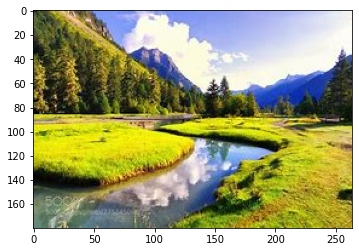

In [5]:
# original coloroured image in rgb
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [6]:
# Identifying the colors present in image
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [7]:
#defining a user made function,for showing pictorial representation
def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors

[array([161.92824568, 173.39753586, 225.44667157]),
 array([93.15420921, 92.10969553, 34.95786162]),
 array([217.94458692, 213.2427968 ,  38.44564288]),
 array([32.93852271, 37.26774736, 17.73586175]),
 array([237.2880572 , 236.74788017, 233.71024162]),
 array([ 44.45783481,  70.82487457, 151.33133925]),
 array([163.9762973 , 157.04605405,  36.00951351]),
 array([116.0541436 , 123.22908584, 115.43541567])]

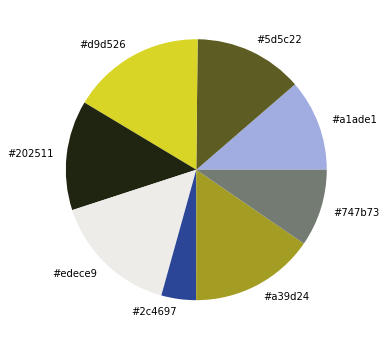

In [8]:
#checking output
get_colors(get_image('/content/myimg.jpg'), 8, True)